In [1]:

# Library to support working with data
import numpy as np
import pandas as pd

# Graphing support library
import matplotlib.pyplot as plt

# Data Normalization Support Library
from sklearn.preprocessing import MinMaxScaler

# Library to support building Linear Regression models
from sklearn.linear_model import LinearRegression

# Performance metrics calculation support library
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error

In [2]:
#Load data
df = pd.read_csv(r'C:\Users\dinhn\Downloads\Bitcoin Historical Data.csv', on_bad_lines='skip', low_memory=False)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,3/1/2019,3821.9,3816.7,3855.8,3816.4,1.74,0.14%
1,3/2/2019,3823.1,3821.9,3843.2,3783.6,1.61,0.03%
2,3/3/2019,3809.5,3823.2,3836.6,3789.7,1.51,-0.36%
3,3/4/2019,3715.9,3809.7,3828.4,3681.8,2.85,-2.45%
4,3/5/2019,3857.2,3715.9,3873.2,3705.7,3.82,3.80%
...,...,...,...,...,...,...,...
1915,5/28/2024,68366.0,69428.3,69560.7,67299.9,71.39K,-1.53%
1916,5/29/2024,67635.8,68366.2,68897.6,67143.2,52.13K,-1.07%
1917,5/30/2024,68354.7,67631.3,69504.7,67138.4,66.84K,1.06%
1918,5/31/2024,67530.1,68352.3,69018.2,66676.8,61.51K,-1.21%


In [3]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index value
df.set_index('Date', inplace=True)
# Select the Close column as the dependent variable
df_Price = df[['Price']]
df_Price = df_Price.reset_index(drop=True)

In [4]:
# Min-max normalization
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(np.array(df_Price))

In [5]:
# Split the data into training, validation and test dataset in a ratio of 6:2:2
train_size = int(0.7 * len(data_scaled))
test_size = int(0.3 * len(data_scaled))


train_data = data_scaled[: train_size]
test_data = data_scaled[train_size:]
     

In [6]:
# Preparing training data
x_train = np.arange(train_size).reshape(-1, 1)
y_train = train_data.reshape(-1)

In [7]:
# Training a Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [8]:
# Showing the model coefficients
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R-squared:", model.score(x_train, y_train))

Intercept: 0.015700674455352115
Coefficients: [0.00042634]
R-squared: 0.41880955278682974


In [9]:
# Preparing testing data
x_test = np.array(range(train_size, len(data_scaled))).reshape(-1, 1)
y_test = np.array(test_data).reshape(-1)
y_pred =  model.predict(x_test)

In [10]:
# Evaluate the accuracy of test
y_test = scaler.inverse_transform(np.array([y_test]).reshape(-1, 1))
y_pred = scaler.inverse_transform(np.array([y_pred]).reshape(-1, 1))

test_mape = mean_absolute_percentage_error(y_test, y_pred)
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_msle = mean_squared_log_error(y_test, y_pred)

print(f"MAPE on Test dataset: ", test_mape)
print(f"RMSE on Test dataset: ", test_rmse)
print(f"MSLE on Test dataset: ", test_msle)

MAPE on Test dataset:  0.7450913722083593
RMSE on Test dataset:  21065.9280578664
MSLE on Test dataset:  0.3484308683606645


In [11]:
# The process of creating index predict next 30 days
last_index =  df_Price.index[-1]

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)

In [12]:
# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(x_next_30_days)
y_next_30_days = scaler.inverse_transform(np.array([y_next_30_days]).reshape(-1, 1))

# Print the predicted closing prices for the next 30 days
print('Predicted Bitcoin prices for the next 30 days:')
print(y_next_30_days.flatten())

Predicted Bitcoin prices for the next 30 days:
[61573.14293889 61602.70981123 61632.27668356 61661.8435559
 61691.41042824 61720.97730057 61750.54417291 61780.11104524
 61809.67791758 61839.24478992 61868.81166225 61898.37853459
 61927.94540692 61957.51227926 61987.0791516  62016.64602393
 62046.21289627 62075.7797686  62105.34664094 62134.91351328
 62164.48038561 62194.04725795 62223.61413029 62253.18100262
 62282.74787496 62312.31474729 62341.88161963 62371.44849197
 62401.0153643  62430.58223664]


In [13]:
# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 30 days
index_next_30_days = pd.date_range(start=next_date, periods=30).tolist()

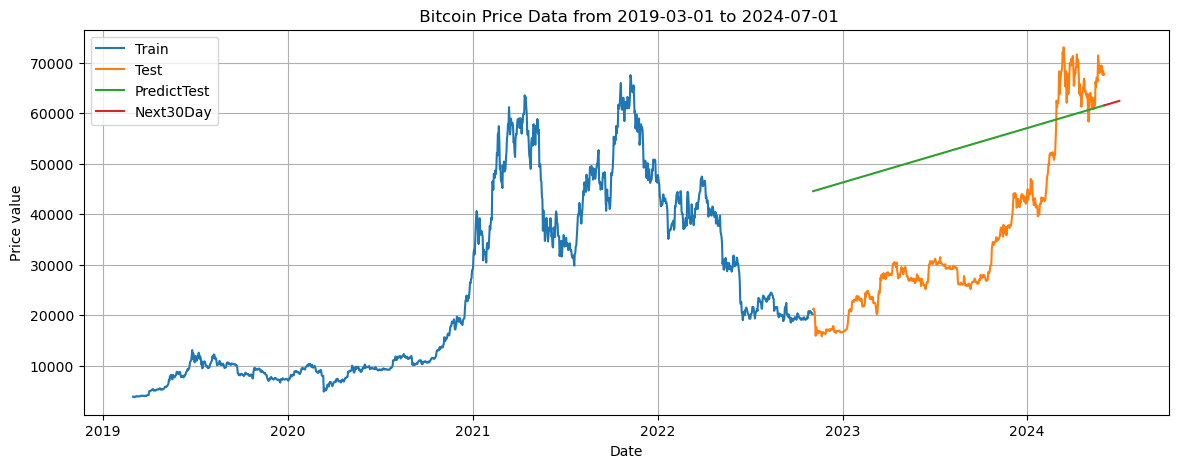

In [14]:
# Drawing
plt.figure(figsize=(14, 5))

plt.plot(df.index[:train_size], scaler.inverse_transform(np.array([y_train]).reshape(-1, 1)))


plt.plot(df.index[train_size :], y_test)

plt.plot(df.index[train_size  :], y_pred)

plt.plot(index_next_30_days, y_next_30_days)

plt.legend(['Train', 'Test', 'PredictTest', 'Next30Day'])

plt.grid()
plt.title(f" Bitcoin Price Data from {df.index[0].strftime('%Y-%m-%d')} to {index_next_30_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Date")
plt.ylabel("Price value")
plt.show()
     

<h2> Predict for 60 days </h2>

In [15]:
# The process of creating index predict next 30 days
last_index =  df_Price.index[-1]

# Create an array of 30 consecutive integers starting from last_index
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)

In [16]:
# Predict the closing prices for the next 30 days
y_next_60_days = model.predict(x_next_60_days)
y_next_60_days = scaler.inverse_transform(np.array([y_next_60_days]).reshape(-1, 1))

# Print the predicted closing prices for the next 30 days
print('Predicted Bitcoin prices for the next 60 days:')
print(y_next_60_days.flatten())

Predicted Bitcoin prices for the next 60 days:
[61573.14293889 61602.70981123 61632.27668356 61661.8435559
 61691.41042824 61720.97730057 61750.54417291 61780.11104524
 61809.67791758 61839.24478992 61868.81166225 61898.37853459
 61927.94540692 61957.51227926 61987.0791516  62016.64602393
 62046.21289627 62075.7797686  62105.34664094 62134.91351328
 62164.48038561 62194.04725795 62223.61413029 62253.18100262
 62282.74787496 62312.31474729 62341.88161963 62371.44849197
 62401.0153643  62430.58223664 62460.14910897 62489.71598131
 62519.28285365 62548.84972598 62578.41659832 62607.98347065
 62637.55034299 62667.11721533 62696.68408766 62726.25096
 62755.81783233 62785.38470467 62814.95157701 62844.51844934
 62874.08532168 62903.65219401 62933.21906635 62962.78593869
 62992.35281102 63021.91968336 63051.48655569 63081.05342803
 63110.62030037 63140.1871727  63169.75404504 63199.32091737
 63228.88778971 63258.45466205 63288.02153438 63317.58840672]


In [17]:
# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 60 days
index_next_60_days = pd.date_range(start=next_date, periods=60).tolist()

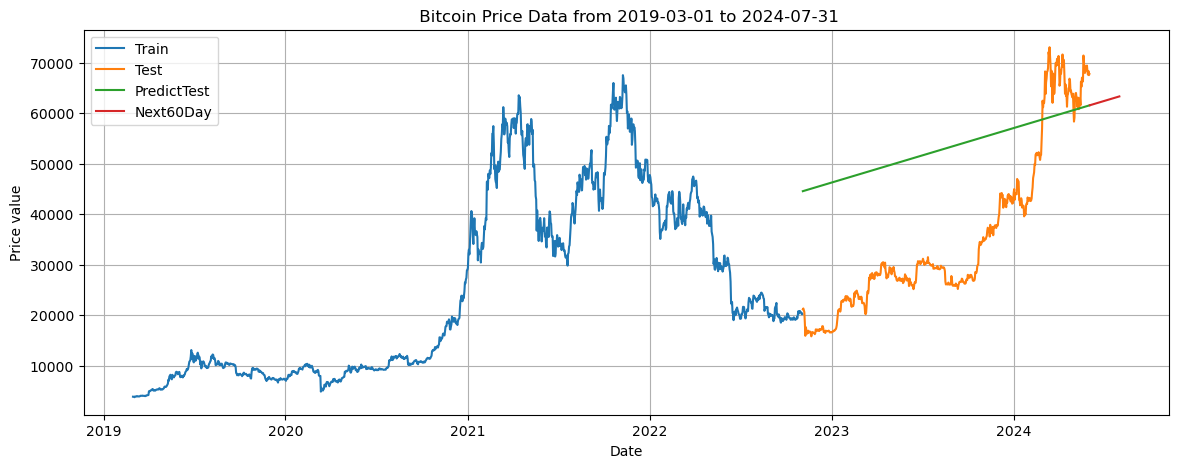

In [18]:
# Drawing
plt.figure(figsize=(14, 5))

plt.plot(df.index[:train_size], scaler.inverse_transform(np.array([y_train]).reshape(-1, 1)))


plt.plot(df.index[train_size :], y_test)

plt.plot(df.index[train_size  :], y_pred)

plt.plot(index_next_60_days, y_next_60_days)

plt.legend(['Train', 'Test', 'PredictTest', 'Next60Day'])

plt.grid()
plt.title(f" Bitcoin Price Data from {df.index[0].strftime('%Y-%m-%d')} to {index_next_60_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Date")
plt.ylabel("Price value")
plt.show()

<h2> Predict 90 days
    </h2>

In [19]:
# The process of creating index predict next 30 days
last_index =  df_Price.index[-1]

# Create an array of 30 consecutive integers starting from last_index
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

In [20]:
# Predict the closing prices for the next 30 days
y_next_90_days = model.predict(x_next_90_days)
y_next_90_days = scaler.inverse_transform(np.array([y_next_90_days]).reshape(-1, 1))

# Print the predicted closing prices for the next 30 days
print('Predicted Bitcoin prices for the next 90 days:')
print(y_next_90_days.flatten())

Predicted Bitcoin prices for the next 90 days:
[61573.14293889 61602.70981123 61632.27668356 61661.8435559
 61691.41042824 61720.97730057 61750.54417291 61780.11104524
 61809.67791758 61839.24478992 61868.81166225 61898.37853459
 61927.94540692 61957.51227926 61987.0791516  62016.64602393
 62046.21289627 62075.7797686  62105.34664094 62134.91351328
 62164.48038561 62194.04725795 62223.61413029 62253.18100262
 62282.74787496 62312.31474729 62341.88161963 62371.44849197
 62401.0153643  62430.58223664 62460.14910897 62489.71598131
 62519.28285365 62548.84972598 62578.41659832 62607.98347065
 62637.55034299 62667.11721533 62696.68408766 62726.25096
 62755.81783233 62785.38470467 62814.95157701 62844.51844934
 62874.08532168 62903.65219401 62933.21906635 62962.78593869
 62992.35281102 63021.91968336 63051.48655569 63081.05342803
 63110.62030037 63140.1871727  63169.75404504 63199.32091737
 63228.88778971 63258.45466205 63288.02153438 63317.58840672
 63347.15527905 63376.72215139 63406.28902

In [21]:
# Get the last date from the current index
last_date = df.index[-1]

# Add one day to the last date
next_date = last_date + pd.DateOffset(days=1)

# Create a list of indices starting from the next date for 60 days
index_next_90_days = pd.date_range(start=next_date, periods=90).tolist()

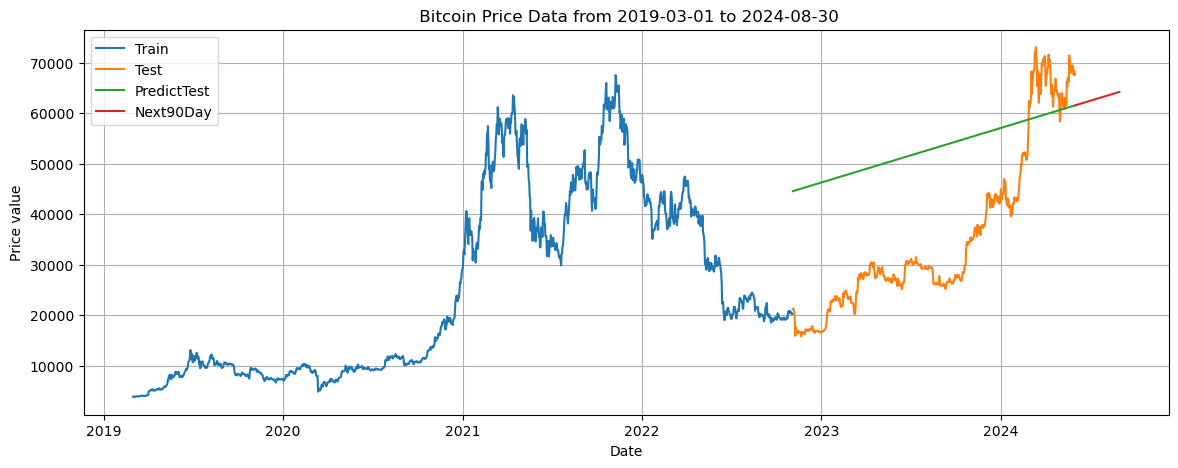

In [22]:
# Drawing
plt.figure(figsize=(14, 5))

plt.plot(df.index[:train_size], scaler.inverse_transform(np.array([y_train]).reshape(-1, 1)))


plt.plot(df.index[train_size :], y_test)

plt.plot(df.index[train_size  :], y_pred)

plt.plot(index_next_90_days, y_next_90_days)

plt.legend(['Train', 'Test', 'PredictTest', 'Next90Day'])

plt.grid()
plt.title(f" Bitcoin Price Data from {df.index[0].strftime('%Y-%m-%d')} to {index_next_90_days[-1].strftime('%Y-%m-%d')}")
plt.xlabel("Date")
plt.ylabel("Price value")
plt.show()